In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ai-vs-human-text:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4288635%2F7379779%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240629%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240629T123806Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D752937547247cd295ff074c5b62db4f4ec59978e02fd3f2dc7a7c0e8f7df7a59006d91fc805c33158a2bec256b3b0f9834d21d2de98f3581c78c67b8f3193569033b5da33a201c7b1e495e0df13bcb720fae29648fc4fd28c1661aae0d4e3434f27f2a958b3dcdc6333f42f23300ddaac59946b9f1d7a57e9ca89b2371545be63f73afc3bf3a21832ef1e42de85b81d7033fa22def5eb6feec0ff4f5ece0c4670cda207553ee6f07d2a33b367212186286d72ad77ed8b81b4b87f14347600bd11b33fe84f47d75322ce8ed2b5f945a0311b2cf3ad5c3312e28a402edfb0c9b30374a9f90638ad0a299d9e97c5ae796d33e0daf78a4b79e29b9fec450dcbb0645'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 366594744 bytes downloaded
Downloaded and uncompressed: ai-vs-human-text
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-vs-human-text/AI_Human.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/ai-vs-human-text/AI_Human.csv')

In [5]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


# **Basic Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [7]:
df.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='generated', ylabel='count'>

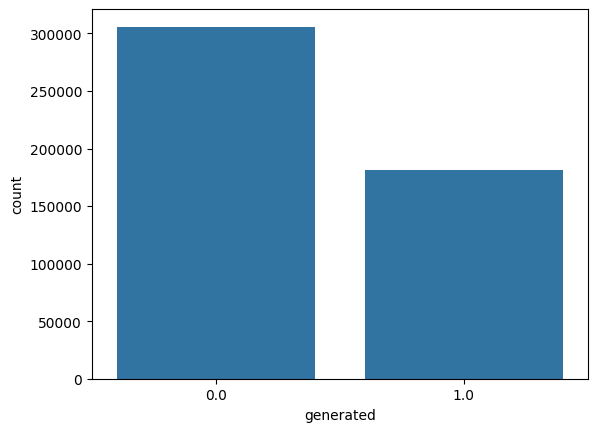

In [8]:
sns.countplot(data=df,x='generated')

In [9]:
print('Total Texts:', df['generated'].count())
print('Human Written Texts:', (df['generated'] == 0.0).sum())
print('AI Generated Texts:', (df['generated'] == 1.0).sum())


Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


# **Preprocessing**

In [10]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [11]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')

    return text


df['text'] = df['text'].apply(remove_tags)


In [12]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "P

In [13]:
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

df['text']=df['text'].apply(remove_punc)


In [16]:
 df['text'][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

# **Spell Check**

In [17]:
import nltk
from nltk.corpus import words

nltk.download('words')
english_words = set(words.words())


def is_spelled_correctly(word):
    return word in english_words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [18]:
word_to_check = df['text'][487232]
if is_spelled_correctly(word_to_check):
    print(f"The word '{word_to_check}' is spelled correctly.")
else:
    print(f"The word '{word_to_check}' is spelled incorrectly.")

The word 'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and ec

In [19]:
df['text'][487232]

'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and economic gr

In [20]:
#import nltk
#from nltk.tok enize import word_tokenize, sent_tokenize
#from nltk.stem import PorterStemmer

#def correct_text(text):
 #   stemmer = PorterStemmer()
  #  english_words = set(words.words())
   # list_text = word_tokenize(text.lower())
    #stemmed_words = [stemmer.stem(word) for word in list_text]
    #for word in stemmed_words:
     #   if word not in english_words:
      #    return word

#correct_text(df['text'][0])


# **Stop Words Removal**

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt') # Download the 'punkt' resource for sentence tokenization
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

df['text']=df['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df['text'][0]

'Cars Cars around since became famous 1900s Henry Ford created built first ModelT Cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doIn like matter article German Suburb Life Goes Without Cars Elizabeth Rosenthal states automobiles linchpin suburbs middle class families either Shanghai Chicago tend make homes Experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe Passenger cars responsible 12 percent greenhouse gas emissions Europeand 50 percent carintensive areas United States Cars main reason greenhouse gas emissions lot people driving around time getting need go Article Paris bans driving due smog Robert Duffer says Paris days nearrecord pollution enforced partial driving ban clear air global city also says Monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day Cars reason poll

# **Splitting the Dataset**

In [25]:
y=df['generated']
X=df['text']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
print(len(X_train))
print(len(y_train))

341064
341064


# **Pipeline**

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [29]:
pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [31]:
y_pred= pipeline.predict(X_test)

# **Evaluation of Results**

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     91597
         1.0       0.98      0.89      0.94     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.95      0.95    146171



In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
